# Making Results from [MemoryUsage Arduino Library](https://github.com/Locoduino/MemoryUsage) Easily Readable

### First we need to clean the data
The data is pasted into an input field, and then split into two dictionaries. (Entering an empty input field will use a default string for testing purposes)

* `dataDict{}` is for graphing data.
* `usageDict{}` is for the calculated sums of each memory block.

Both are printed for the user and the graphable data is returned for future use.

In [6]:
import re

def getData():
    ramData = input("Paste in MemoryUsage output: ")
    if ramData == '':
        ramData = "Data start:256 Heap start:1744 Heap end:1744 Stack start:2297 Stack end:2303 Heap size:0"

    words = ramData.split() # Split input string by individual words
    dataList = [' '.join(words[i: i + 2]) for i in range(0, len(words), 2)] # Rejoin every other word
    
    dataDict = {} # Empty dictionary for formatted data
    for i in dataList:
        dataDict.update({i.split(":")[0] : int(i.split(":")[1])})

    usageDict = {} # Empty dictionary for calculated usages values
    usageDict.update({"Data" : dataDict.get("Data start")})
    usageDict.update({"BSS" : dataDict.get("Heap end") - dataDict.get("Data start")})
    usageDict.update({"Heap" : dataDict.get("Heap end")- dataDict.get("Heap start")})
    usageDict.update({"Free" : dataDict.get("Stack start")-dataDict.get("Heap end")})
    usageDict.update({"Stack" : dataDict.get("Stack end") - dataDict.get("Stack start")})
    
    print("Data Dict: ", dataDict)
    print("Usage Dict", usageDict)

    return(dataDict)

### Next we plot the data
Here we are using a horizontal bar graph to visualize the RAM usage.

In [7]:
import matplotlib.pyplot as plt
import numpy as np 

def plotData(DataDict):
    label = "RAM"
    data = DataDict.get("Data start")
    bss = DataDict.get("Heap start") - DataDict.get("Data start")
    heap = DataDict.get("Heap end") - DataDict.get("Heap start")
    free = DataDict.get("Stack start") - DataDict.get("Heap end")
    stack = DataDict.get("Stack end") - DataDict.get("Stack start")
    width = 0.3

    fig, ax = plt.subplots()
    ax.set_ylim(0, width)
    ax.set_xlim(0, 2303)
    ax.barh(label, data, width, label = 'Data')
    ax.barh(label, bss, width, left= data, label = 'BSS')
    ax.barh(label, heap, width, left= data+bss, label = 'Heap')
    ax.barh(label, free, width, left= data+bss+heap, label = 'Free')
    ax.barh(label, stack, width, left= data+bss+heap+free, label = 'Stack')
    
    plt.xticks(range(0,DataDict.get("Stack end"),250))
    
    ax.set_xlabel("Bytes")
    ax.set_title("RAM Usage by Category")
    ax.legend()

    plt.show()

### Now to run it all together...

Will this be the key to optomize [Arduino-Nano-Watch](https://github.com/nick-burrill/Arduino-Nano-Watch) to fit inside its 1kb of free memory?

Data Dict:  {'Data start': 256, 'Heap start': 1744, 'Heap end': 1744, 'Stack start': 2297, 'Stack end': 2303, 'Heap size': 0}
Usage Dict {'Data': 256, 'BSS': 1488, 'Heap': 0, 'Free': 553, 'Stack': 6}


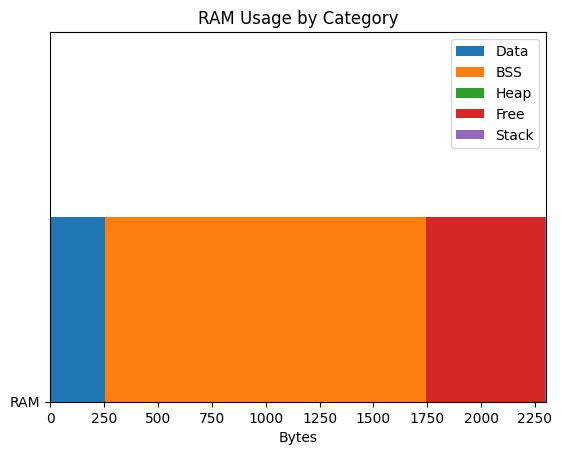

In [9]:
plotData(getData())